In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<font size="5">2. Paramétrages Data Visualisation</font>

In [2]:
# Créer un objet de police avec le nom de fichier de la police TrueType
optima_font = fm.FontProperties(fname=r'C:\Users\omira\Downloads\Optima Medium.ttf')

# Ajouter une ombre à la police
shadow = path_effects.withSimplePatchShadow(offset=(1,-0.75), shadow_rgbFace='darkblue', alpha=0.25)

# Utiliser la police dans les graphiques, changer la couleur et augmenter la résolution d'affichage
plt.rcParams['font.family'] = optima_font.get_name()
plt.rcParams['text.color'] = 'white'
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.style.use('dark_background')
# set le theme seaborn
sns.set_style('darkgrid', {'axes.facecolor': '0.2','text.color': 'white','figure.figsize': (20, 16)})
plt.rcParams['figure.facecolor'] = '0.2'
# définition des paramètres kwargs typo
text_kwargs = dict(ha='center', va='center', fontsize=10, color='white')

# suppression de l'affichage max des colonnes
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('olist_master.csv')

In [4]:
df.describe()

,customer_zip_code_prefix,review_score,price,freight_value,seller_zip_code_prefix,payment_installments,payment_value,day_of_week,month,trimester,year,delivery_time_days,average_price_cat,nb_purchase_last_3_months,total_amount_client,nb_different_product_client,days_since_last_purchase
count,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000
mean,35092.930451,4.124762,123.418797,20.114023,24655.469105,2.909324,157.076211,2.759565,6.041962,2.359041,2017.541507,12.011131,123.418797,0.151352,190.954881,1.016681,272.350500
std,29796.573959,1.310700,185.060447,15.787244,27699.065095,2.731772,209.709180,1.966455,3.221965,1.058355,0.504107,9.462850,62.089043,0.449153,347.056542,0.131686,153.204854
min,1003.000000,1.000000,0.850000,0.000000,1001.000000,0.000000,0.010000,0.000000,1.000000,1.000000,2016.000000,0.000000,28.452917,0.000000,6.150000,1.000000,32.000000
25%,11340.000000,4.000000,40.000000,13.160000,6429.000000,1.000000,58.275000,1.000000,3.000000,1.000000,2017.000000,6.000000,93.602427,0.000000,63.270000,1.000000,148.000000
50%,24360.000000,5.000000,78.000000,16.360000,13720.000000,2.000000,102.660000,3.000000,6.000000,2.000000,2018.000000,10.000000,117.069382,0.000000,110.460000,1.000000,254.000000
75%,58622.500000,5.000000,138.500000,21.240000,29156.000000,4.000000,176.655000,4.000000,8.000000,3.000000,2018.000000,15.000000,134.202466,0.000000,195.035000,1.000000,383.000000
max,99980.000000,5.000000,6499.000000,409.680000,99730.000000,24.000000,6726.660000,6.000000,12.000000,4.000000,2018.000000,208.000000,1117.622000,8.000000,15978.650000,3.000000,727.000000


In [7]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,review_score,product_id,seller_id,...,trimester,year,delivery_time_days,average_price_cat,nb_purchase_last_3_months,total_amount_client,nb_different_product_client,days_since_last_purchase,review_time_response,mean_satisfaction_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,-0.694175,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,4.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,...,2,2017,-0.423884,0.672204,0.0,-0.127026,1,1.498977,9,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,-0.849193,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,5.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,...,1,2018,0.421531,-0.480222,0.0,0.416433,1,-0.074087,17,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,-1.139127,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,...,2,2018,1.478301,0.672204,0.0,-0.095734,1,-0.903047,27,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,-0.883258,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,5.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,...,1,2018,0.210178,0.672204,0.0,-0.050871,1,-0.465722,15,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,-0.739583,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,5.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,...,3,2018,-0.106853,0.241076,1.0,0.176615,1,-1.366481,12,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102326,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,-1.045626,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,4.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,...,2,2018,-0.635238,-0.613728,0.0,-0.294406,1,-0.628903,7,4.0
102327,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,-0.950749,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,5.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,...,2,2018,-0.529561,-0.102264,0.0,-0.178343,1,-0.609321,8,5.0
102328,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,0.839767,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,...,2,2018,1.901008,0.173682,0.0,-0.388742,1,-0.635430,31,1.0
102329,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,1.913889,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,5.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,...,4,2017,-0.001176,1.302605,0.0,1.498654,1,0.382819,13,5.0


<font size="5">6. Normalisation des variables</font>

In [6]:
# Sélection de toutes les variables à normaliser
to_normalize = ['customer_zip_code_prefix', 'price', 'freight_value',
'payment_value', 'seller_zip_code_prefix','days_since_last_purchase', 'delivery_time_days', 'price',
'average_price_cat', 'total_amount_client']

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Normalisation de toutes les variables sélectionnées
df[to_normalize] = scaler.fit_transform(df[to_normalize])

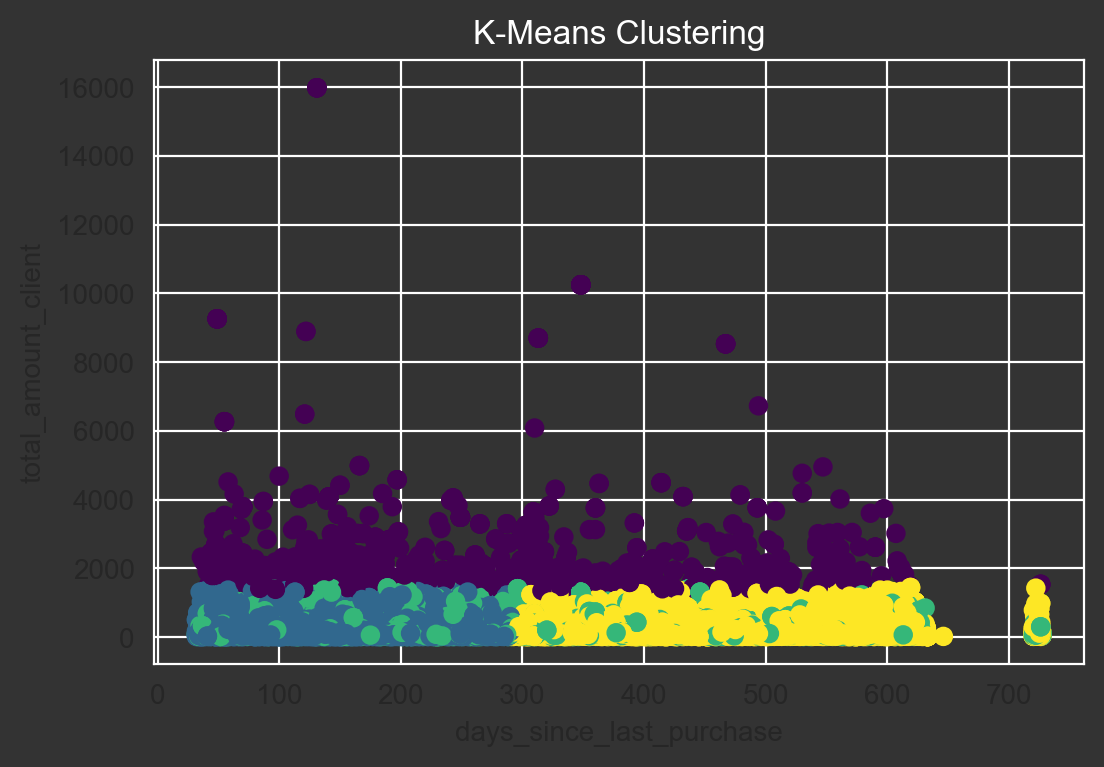

In [91]:
# Sélectionner les variables pertinentes pour la segmentation
X = df[['days_since_last_purchase', 'total_amount_client', 'review_score']]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Définir le nombre de clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Appliquer l'algorithme de k-means sur les données normalisées
kmeans.fit(X_scaled)

# Ajouter la colonne de labels de clusters au dataframe
df['cluster'] = kmeans.labels_

# Afficher un graphique de dispersion avec les couleurs des clusters
plt.scatter(df['days_since_last_purchase'], df['total_amount_client'], c=df['cluster'], cmap='viridis')
plt.xlabel('days_since_last_purchase')
plt.ylabel('total_amount_client')
plt.title('K-Means Clustering')
plt.show()

Nombre de clients par cluster:
1    46654
3    36407
2    18224
0     1046
Name: cluster, dtype: int64


C:\Users\omira\AppData\Local\Temp\ipykernel_17872\3751433051.py:36: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


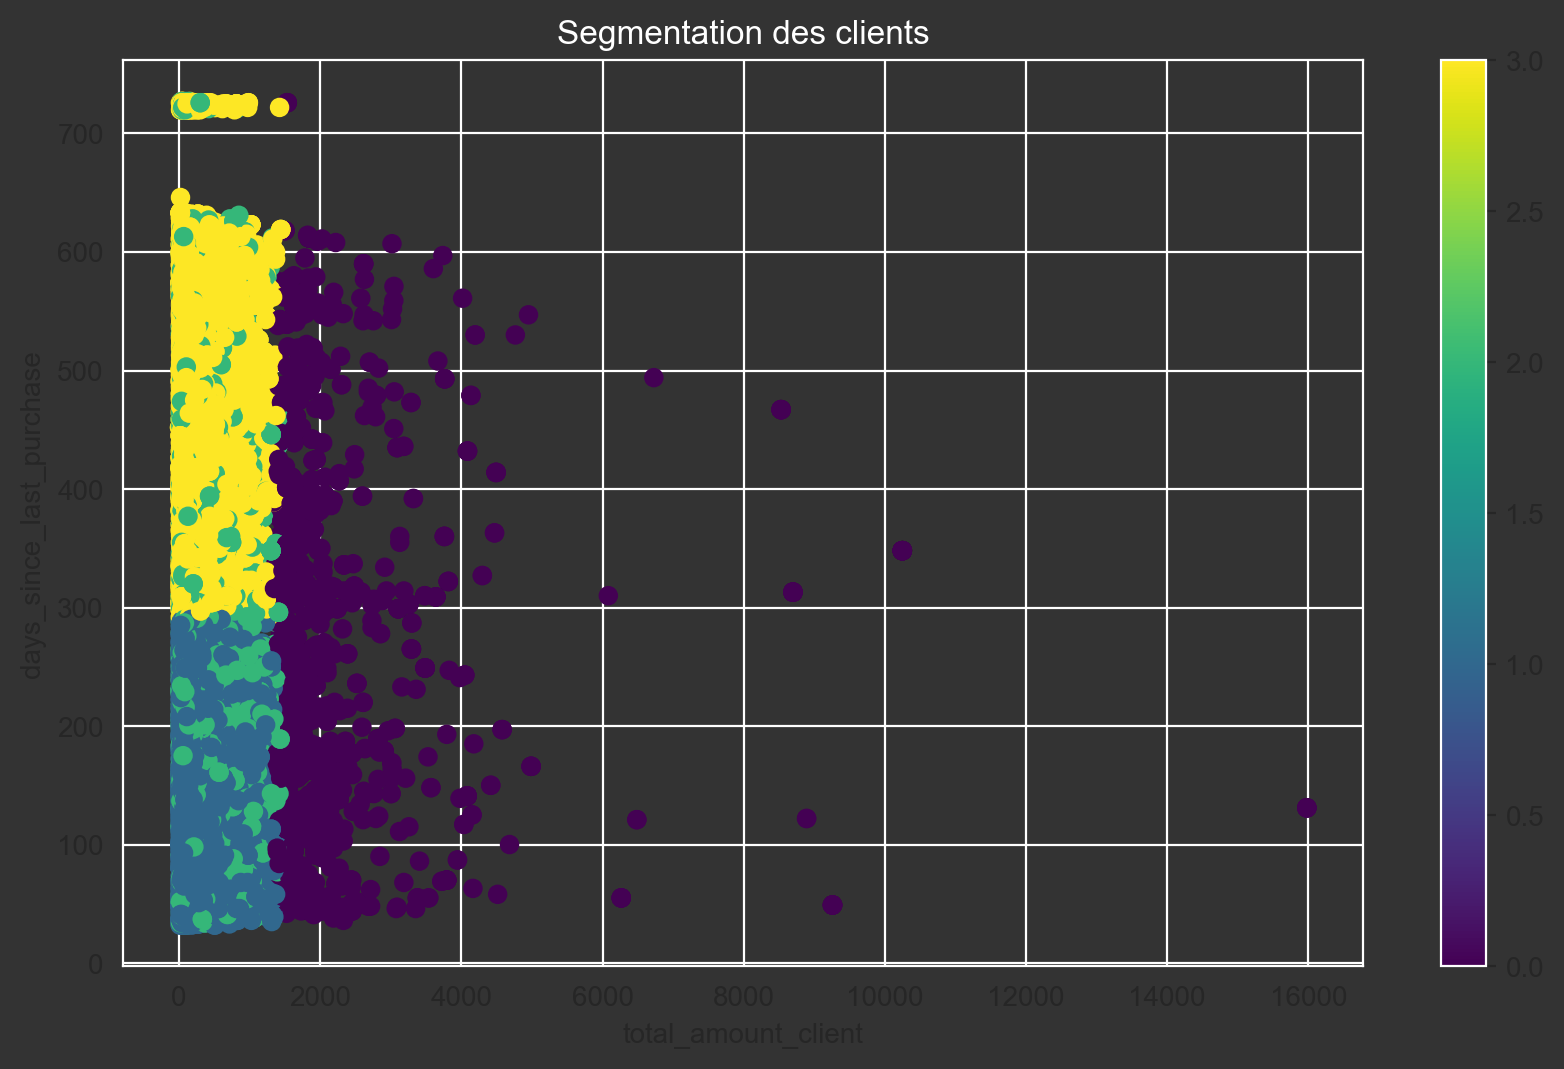

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Chargement des données
data = pd.read_csv('https://raw.githubusercontent.com/random-agile/Client-Segmentation/main/olist_master.csv')

# Sélection des colonnes pertinentes pour la segmentation
selected_columns = ['total_amount_client', 'review_score', 'days_since_last_purchase']
X = data[selected_columns]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Ajout des étiquettes de clusters au dataframe d'origine
data['cluster'] = kmeans.labels_

# Analyse des clusters
cluster_counts = data['cluster'].value_counts()
print("Nombre de clients par cluster:")
print(cluster_counts)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['total_amount_client'], X['days_since_last_purchase'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('total_amount_client')
plt.ylabel('days_since_last_purchase')
plt.title('Segmentation des clients')
plt.colorbar()
plt.show()

In [70]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger le dataframe à partir du fichier CSV
df = pd.read_csv('olist_master.csv')

# Sélectionner les colonnes pertinentes pour la segmentation des clients
selected_columns = ['total_amount_client', 'review_score', 'days_since_last_purchase', 'payment_installments']

# Filtrer les lignes avec des valeurs manquantes
df = df[selected_columns]

In [71]:
df

,total_amount_client,review_score,days_since_last_purchase,payment_installments
0,146.87,4.0,502,2.0
1,335.48,5.0,261,8.0
2,157.73,5.0,134,7.0
3,173.30,5.0,201,1.0
4,252.25,5.0,63,8.0
...,...,...,...,...
102326,88.78,4.0,176,6.0
102327,129.06,5.0,179,3.0
102328,56.04,1.0,175,5.0
102329,711.07,5.0,331,2.0


In [72]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

In [73]:
df_normalized

array([[-0.12702569, -0.09518764,  1.49897746, -0.33287116],
       [ 0.41643308,  0.66776734, -0.07408744,  1.86351616],
       [-0.09573381,  0.66776734, -0.90304695,  1.49745161],
       ...,
       [-0.38874225, -2.38405256, -0.6354301 ,  0.7653225 ],
       [ 1.49865396,  0.66776734,  0.38281938, -0.33287116],
       [-0.48748745,  0.66776734,  0.08256633, -0.69893572]])

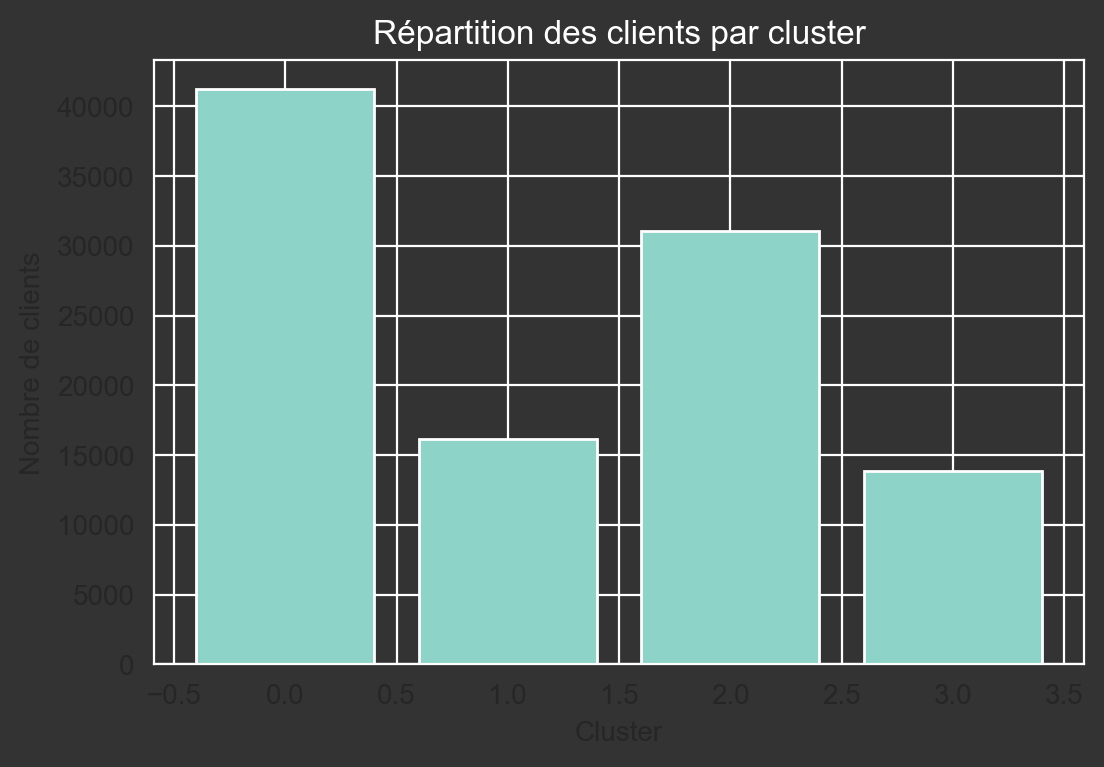

In [74]:
# Appliquer l'algorithme K-means pour effectuer la segmentation
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_normalized)

# Assigner les clusters aux données
df['cluster'] = kmeans.labels_

# Afficher la répartition des clusters
cluster_counts = df['cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients')
plt.title('Répartition des clients par cluster')
plt.show()

In [80]:
# Calculer les moyennes des variables pour chaque cluster
cluster_means = df.groupby('cluster').mean()

# Afficher les moyennes des variables pour chaque cluster
print(cluster_means)

         total_amount_client  review_score  days_since_last_purchase  \
cluster                                                                
0                 132.727897      4.686488                154.731909   
1                 190.018630      1.641859                264.901533   
2                 135.580691      4.635435                428.981828   
3                 488.854257      4.207997                280.222478   

         payment_installments  
cluster                        
0                    1.887744  
1                    2.363518  
2                    2.056739  
3                    8.486960  


In [89]:
# Calculer les moyennes des variables pour chaque cluster
cluster_describe = df.groupby('cluster').describe()

# Définir la largeur maximale des colonnes de sortie
pd.set_option('display.width', 110)
# Afficher les moyennes des variables pour chaque cluster
print(cluster_describe)

        total_amount_client                                                                       \
                      count        mean         std    min       25%     50%       75%       max   
cluster                                                                                            
0                   41236.0  132.727897  133.800840   9.59   56.3900   95.37  160.1625   1681.71   
1                   16178.0  190.018630  224.932891  11.54   66.3425  117.85  216.4000   2905.53   
2                   31037.0  135.580691  147.317933   6.15   56.7800   92.78  156.7300   1878.39   
3                   13880.0  488.854257  788.474472  37.58  149.6900  254.20  534.2775  15978.65   

        review_score                                              days_since_last_purchase              \
               count      mean       std  min  25%  50%  75%  max                    count        mean   
cluster                                                                                

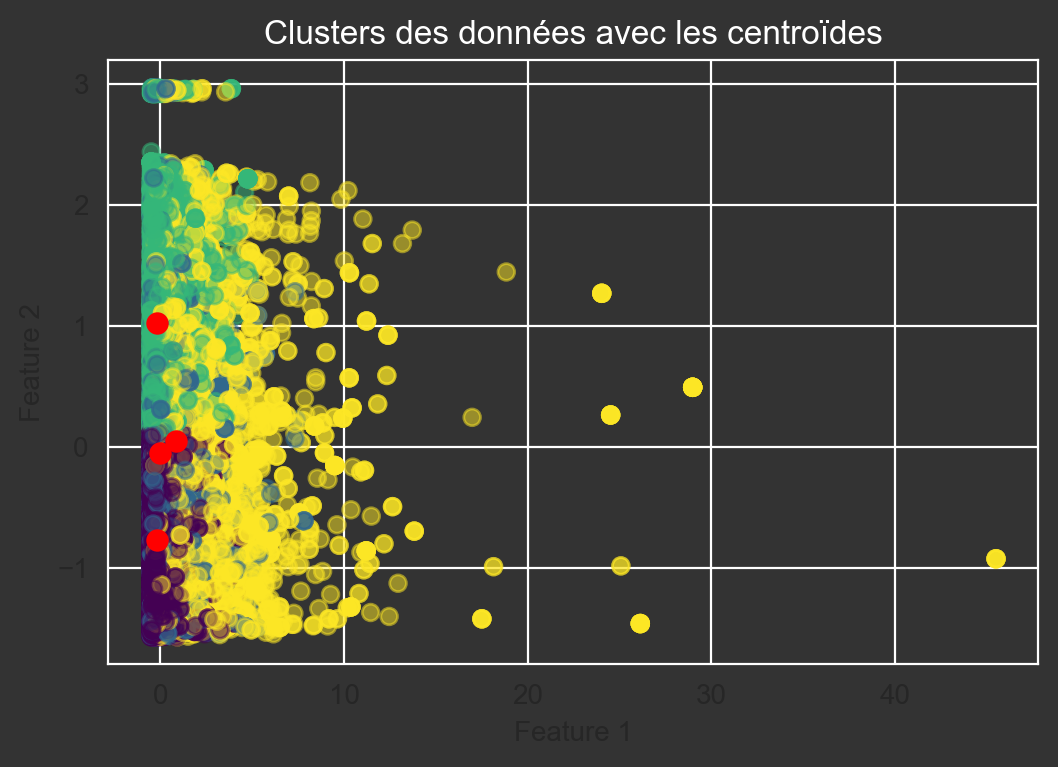

In [82]:
# Obtenir les coordonnées des centroïdes
centroids = kmeans.cluster_centers_

# Assigner les clusters aux données
df['cluster'] = kmeans.labels_

# Créer une liste de couleurs pour les points de données
colors = ['blue', 'green', 'purple']

# Tracer les points de données
plt.scatter(df_normalized[:, 0], df_normalized[:, 2], c=df['cluster'], cmap='viridis', alpha=0.5)

# Tracer les centroïdes
plt.scatter(centroids[:, 0], centroids[:, 2], marker='o', s=50, color='r')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters des données avec les centroïdes')
plt.show()

In [93]:
import plotly.express as px

data = [
    {'r': 40.29, 'theta': 'Cluster 1'},
    {'r': 15.80, 'theta': 'Cluster 2'},
    {'r': 30.33, 'theta': 'Cluster 3'},
    {'r': 13.56, 'theta': 'Cluster 4'},
]

fig = px.line_polar(data, r='r', theta='theta',title="Taille des clusters en pourcentage", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)

# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,100], # plage maximale de l'axe radial
            showticklabels=True
        )
    )
)

# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)

fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [94]:
data = [
    {'r': 4.68, 'theta': 'Cluster 1'},
    {'r': 1.64, 'theta': 'Cluster 2'},
    {'r': 4.63, 'theta': 'Cluster 3'},
    {'r': 4.20, 'theta': 'Cluster 4'},
]

fig = px.line_polar(data, r='r', theta='theta',title="Moyenne des review score des clusters", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)

# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,5], # plage maximale de l'axe radial
            showticklabels=True
        )
    )
)

# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)

fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [96]:
data = [
    {'r': 154.73, 'theta': 'Cluster 1'},
    {'r': 264.90, 'theta': 'Cluster 2'},
    {'r': 428.98, 'theta': 'Cluster 3'},
    {'r': 280.22, 'theta': 'Cluster 4'},
]

fig = px.line_polar(data, r='r', theta='theta',title="Moyenne du nombre de jours après un dernier achat des clusters", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)

# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,500], # plage maximale de l'axe radial
            showticklabels=True
        )
    )
)

# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)

fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [98]:
data = [
    {'r': 1.88, 'theta': 'Cluster 1'},
    {'r': 2.36, 'theta': 'Cluster 2'},
    {'r': 3.05, 'theta': 'Cluster 3'},
    {'r': 8.48, 'theta': 'Cluster 4'},
]

fig = px.line_polar(data, r='r', theta='theta',title="Moyenne du nombre de paiements des clusters", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)

# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,10], # plage maximale de l'axe radial
            showticklabels=True
        )
    )
)

# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)

fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

